In [22]:
import xml.etree.ElementTree

import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
reviews = pd.read_csv('../data/reviews_arhip.csv', names=['text', 'label'], encoding='utf-8')

In [57]:
kinopoisk_bottom100_xml = xml.etree.ElementTree.parse('../data/datasets/kinopoisk_bottom100.xml').getroot()
kinopoisk_top250_xml = xml.etree.ElementTree.parse('../data/datasets/kinopoisk_top250.xml').getroot()#.getchildren()[1]
rows = []
for row_xml in list(kinopoisk_bottom100_xml) + list(kinopoisk_top250_xml):
    row = []
    for cell in list(row_xml):
        row.append(cell.text)
    rows.append(row)

In [58]:
kinopoisk = pd.DataFrame(rows, columns=['author', 'date', 'title', 'label', 'grade10', 'movieName', 'text'])
kinopoisk = kinopoisk[['text', 'label']]
kinopoisk.loc[:, 'label'] = kinopoisk['label'].apply({'Bad' : -1, 'Neutral' : 0, 'Good' : 1}.get)
kinopoisk.head()

,text,label
0,\n Сегодня пришло время поговорить об одн...,1
1,"\n Смотрела этот фильм, периодически став...",1
2,\n Когда-то американское кино для подрост...,-1
3,"\n Представь, что тебе в ухо вставляют со...",-1
4,\n Мне не понравился этот фильм. \n\n\n\n...,-1


In [59]:
kinopoisk.shape

(36358, 2)

In [61]:
print kinopoisk.text[0]


      Сегодня пришло время поговорить об одном из самых интересных феноменов мирового кинематографа XXI века: о фильме «18-летняя девственница», который с невероятной легкостью покорежил мозги, сердца и души тысяч киноманов по всему миру. 



Правдивая история создания. Исследователи полагают, что появлением «Девственницы» мы обязаны сочетанию тяжелого материального положения, сурового алкогольного опьянения и не вовремя просмотренных «Зак и Мири снимают порно» Кевина Смита. В этих условиях Тамара Олсон просто обречена была попытаться заработать на липосакцию выпуском порноленты в духе незабвенных «Пэтэушниц в камере пыток». Она выдала себя за режиссера и заманила в проект четверых актеров, умиравших от голода на задворках Голливуда, а также мужика с личной камерой, готового работать за строчку в титрах. Видя недостаток ресурсов, предприимчивая леди попробовала себя в роли няни и сиделки: так в ее сети попали детишки и чей-то парализованный дедушка. Статистами выступили гости частной 

In [62]:
kinopoisk = kinopoisk[~kinopoisk.text.duplicated()]
kinopoisk.shape

(36346, 2)

In [63]:
print kinopoisk.shape
kinopoisk.dropna(inplace=True)
print kinopoisk.shape

(36346, 2)
(36346, 2)


Соотношение классов:

In [64]:
kinopoisk['label'].value_counts()

 1    27044
-1     4743
 0     4559
Name: label, dtype: int64

Распределение длин сообщений (в символах)

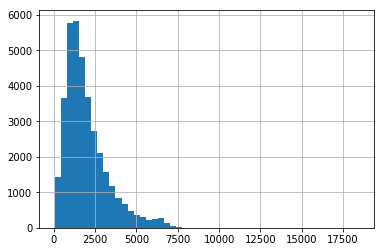

In [65]:
kinopoisk.text.apply(len).hist(bins=50);

Распределение длин сообщений (~в словах)

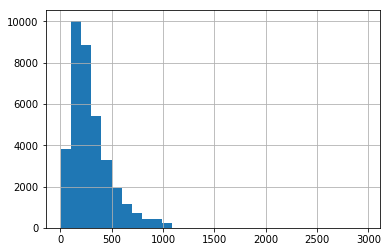

In [66]:
kinopoisk.text.apply(lambda s: len(s.split())).hist(bins=30);

In [67]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(kinopoisk.text, kinopoisk.label,
                                                    test_size=TEST_SIZE, random_state=42)

In [68]:
reviews_train = pd.DataFrame(X_train)
reviews_train['label'] = y_train

reviews_test = pd.DataFrame(X_test)
reviews_test['label'] = y_test

In [69]:
reviews_train.to_csv('../data/kinopoisk_train.csv', index=False, encoding='utf-8')
reviews_test.to_csv('../data/kinopoisk_test.csv', index=False, encoding='utf-8')

---